In [1]:
'''
DATASET
TrashImage - v2 TrashImage_ver1.0
==============================

This dataset was exported via roboflow.ai on June 13, 2022 at 5:56 PM GMT

It includes 2072 images.
Trash are annotated in YOLO v5 PyTorch format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 416x416 (Stretch)

The following augmentation was applied to create 3 versions of each source image:
* Equal probability of one of the following 90-degree rotations: none, clockwise, counter-clockwise, upside-down
'''

'\nDATASET\nTrashImage - v2 TrashImage_ver1.0\n==============================\n\nThis dataset was exported via roboflow.ai on June 13, 2022 at 5:56 PM GMT\n\nIt includes 2072 images.\nTrash are annotated in YOLO v5 PyTorch format.\n\nThe following pre-processing was applied to each image:\n* Auto-orientation of pixel data (with EXIF-orientation stripping)\n* Resize to 416x416 (Stretch)\n\nThe following augmentation was applied to create 3 versions of each source image:\n* Equal probability of one of the following 90-degree rotations: none, clockwise, counter-clockwise, upside-down\n'

In [2]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt 

Cloning into 'yolov5'...
remote: Enumerating objects: 14546, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 14546 (delta 32), reused 42 (delta 20), pack-reused 14478
Receiving objects: 100% (14546/14546), 13.72 MiB | 25.91 MiB/s, done.
Resolving deltas: 100% (10014/10014), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 6.6 MB/s 
     |████████████████████████████████| 761 kB 62.2 MB/s 
     |████████████████████████████████| 9.4 MB 63.2 MB/s 
     |████████████████████████████████| 17.1 MB 33.3 MB/s 
     |████████████████████████████████| 3.2 MB 26.8 MB/s 
     |████████████████████████████████| 280 kB 78.7 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
     |██████████████████████████████  | 834.1 MB 1.5 MB/s eta 0:00:36tcmalloc: large alloc 

In [3]:
#Change dir to clone yolov5 dir
%cd /content/yolov5

/content/yolov5


In [4]:
# install dependencies as necessary
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.downloads import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.1+cu117 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [5]:
%cd /content
!curl -L "https://app.roboflow.com/ds/maUVBwbTKD?key=NTwQEzQOIh" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1865      0 --:--:-- --:--:-- --:--:--  1861
100 32.8M  100 32.8M    0     0  31.2M      0  0:00:01  0:00:01 --:--:-- 31.2M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/bio0000_frame0000212_jpg.rf.bef7925851d53558b09dd82fc027a891.jpg  
 extracting: test/images/bio0001_frame0000023_jpg.rf.15297487b07a40584dd91d35fdddfcc6.jpg  
 extracting: test/images/bio0001_frame0000103_jpg.rf.c63b07d312cf2588374024dd216e9f1c.jpg  
 extracting: test/images/bio0001_frame0000123_jpg.rf.161249157c45e2458c411695ff94ed39.jpg  
 extracting: test/images/bio0001_frame0000332_jpg.rf.a19e0df3fe949682a27c8d10132074d4.jpg  
 extracting: test/images/bio0001_

In [6]:
# This is the yaml file roboflow wrote for us
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 13
names: ['0', '1', '2', 'bio', 'metal', 'paper', 'papper', 'plastic', 'platstic', 'rov', 'timestamp', 'unknown', 'wood']

In [7]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jR8G4C2yoo01TaGrdCD4")
project = rf.workspace("kuldeepaman").project("trashimage")
dataset = project.version(2).download("yolov5")

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 877 kB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 
     |████████████████████████████████| 178 kB 49.1 MB/s 
     |████████████████████████████████| 138 kB 69.4 MB/s 
     |████████████████████████████████| 145 kB 82.6 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f9b1dc90d96dd237ddf5d8847fb07bcb7eab4d547bbd4a204b70fea56e266c80
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to TrashImage-2 in yolov5pytorch:: 100%|██████████| 4142/4142 [00:01<00:00, 3577.94it/s]


In [8]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [9]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- '0'
- '1'
- '2'
- bio
- metal
- paper
- papper
- plastic
- platstic
- rov
- timestamp
- unknown
- wood
nc: 13
train: TrashImage-2/train/images
val: TrashImage-2/valid/images


In [10]:
#this is the model configuration we will use for our tutorial 
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [11]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [12]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [13]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 200 --data {dataset.location}/data.yaml --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
train: weights=, cfg=./models/yolov5s.yaml, data=/content/yolov5/TrashImage-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2

In [14]:
!python val.py --weights runs/train/yolov5s_results/weights/best.pt --data {dataset.location}/data.yaml --img 640

val: data=/content/yolov5/TrashImage-2/data.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/yolov5/TrashImage-2/valid/labels.cache... 216 images, 4 backgrounds, 0 corrupt: 100% 216/216 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:06<00:00,  1.03it/s]
                   all        216        433      0.627      0.462      0.428      0.201
                     0        216        102      0.527      0.706      0.659      

In [15]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
#%load_ext tensorboard
#%tensorboard --logdir runs

In [16]:
!pip uninstall imgaug
!pip install imgaug==0.4.0

Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/imgaug-0.4.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 7.5 MB/s 


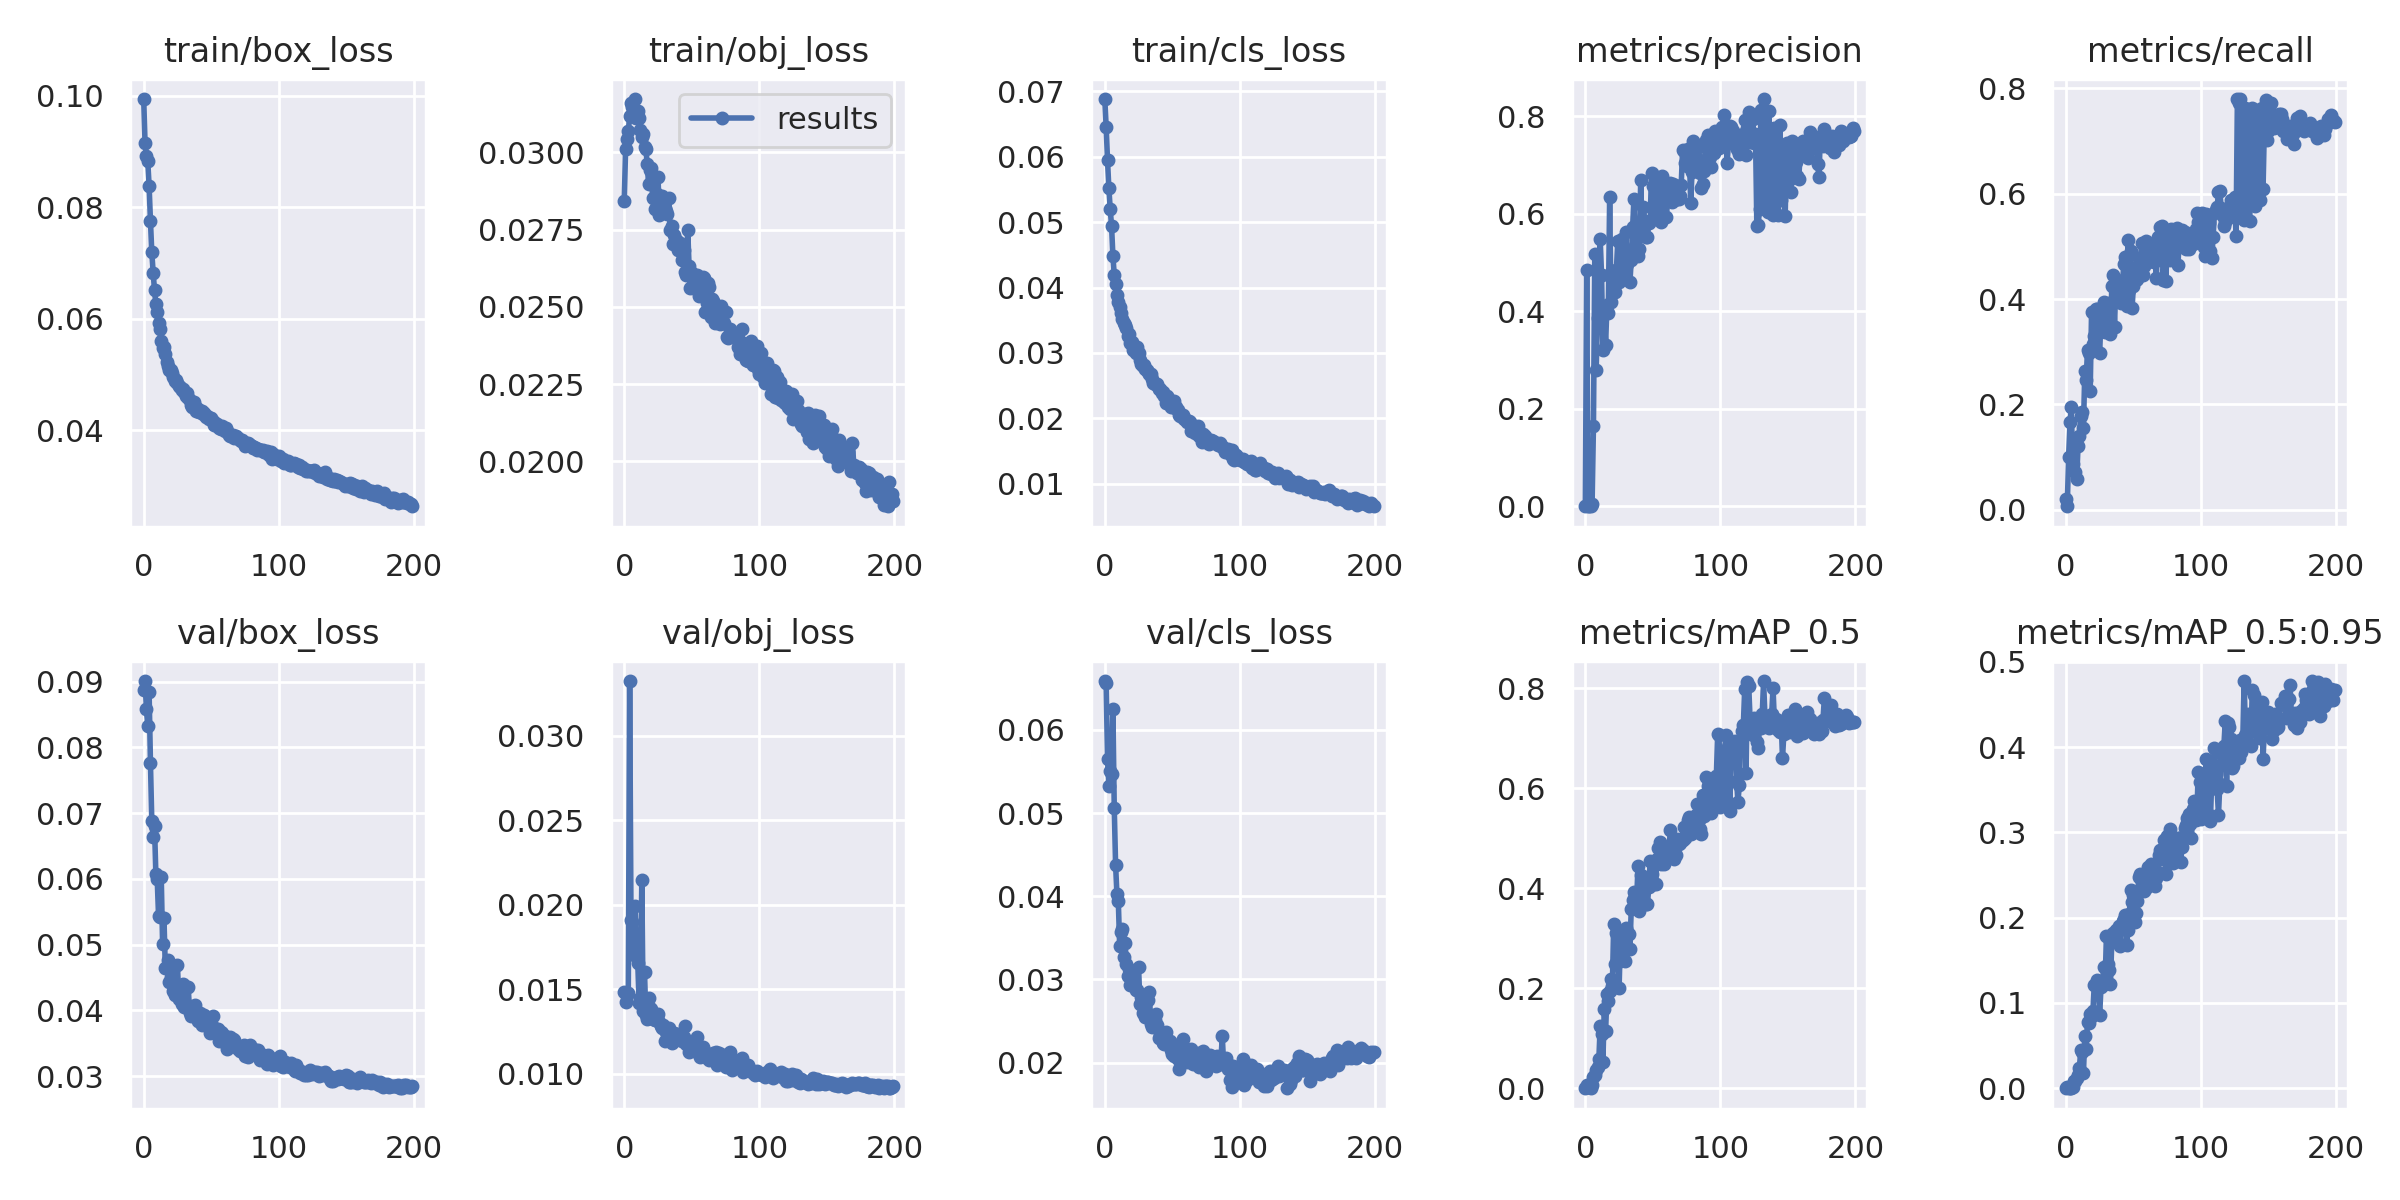

In [17]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
#from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


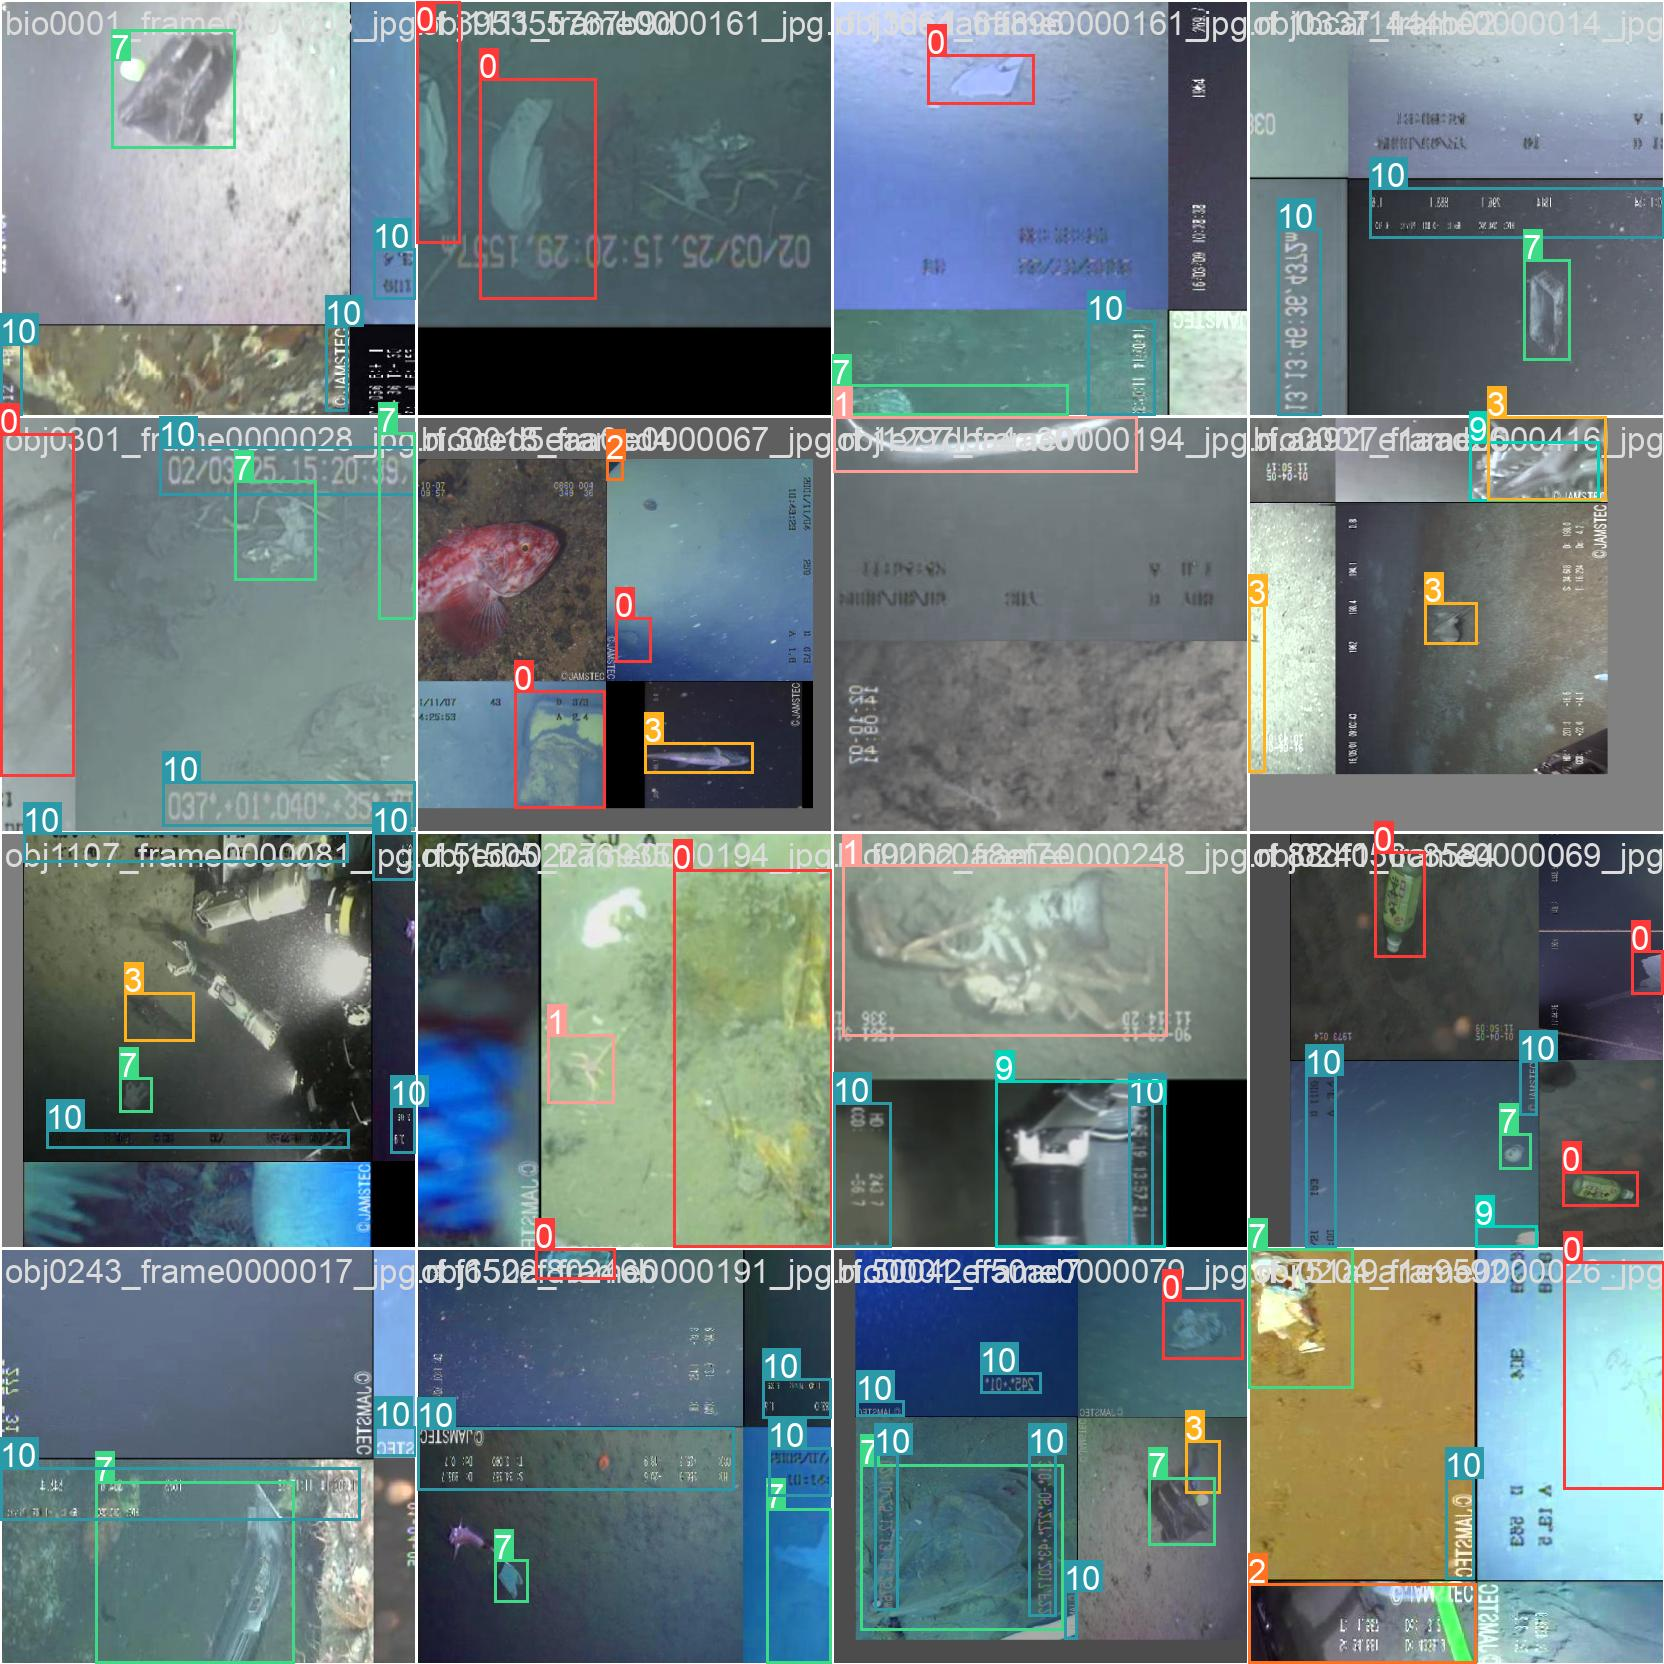

In [18]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


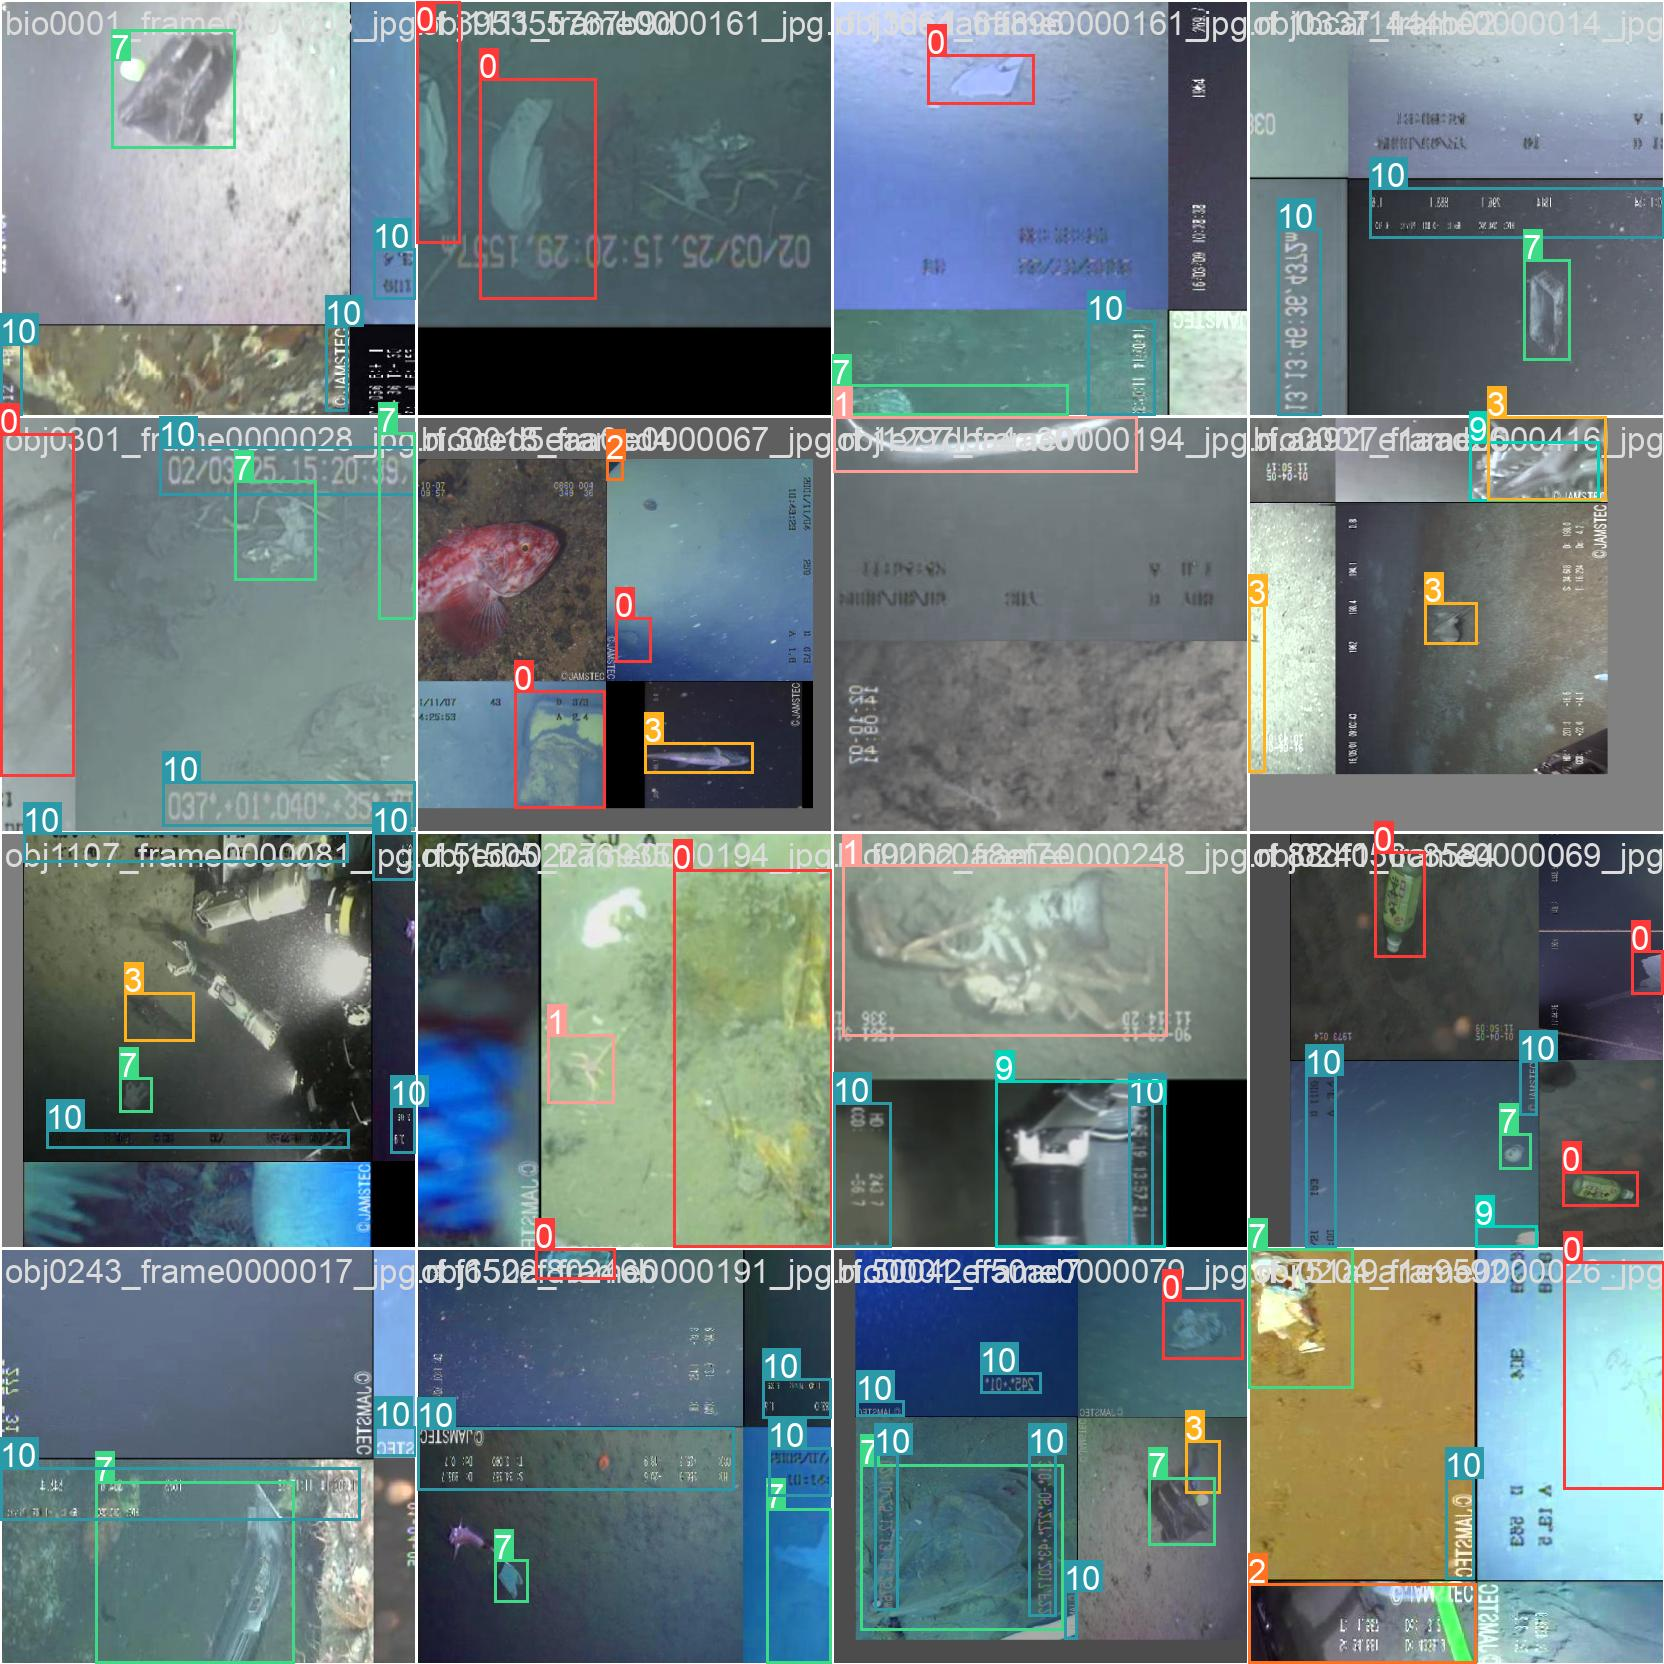

In [19]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [20]:
# trained weights are saved by default in our weights folder
%ls runs/

train/  val/


In [21]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [22]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/107 /content/test/images/bio0000_frame0000212_jpg.rf.bef7925851d53558b09dd82fc027a891.jpg: 416x416 1 1, 8.1ms
image 2/107 /content/test/images/bio0001_frame0000023_jpg.rf.15297487b07a40584dd91d35fdddfcc6.jpg: 416x416 1 bio, 1 plastic, 8.1ms
image 3/107 /content/test/images/bio0001_frame0000103_jpg.rf.c63b07d312cf2

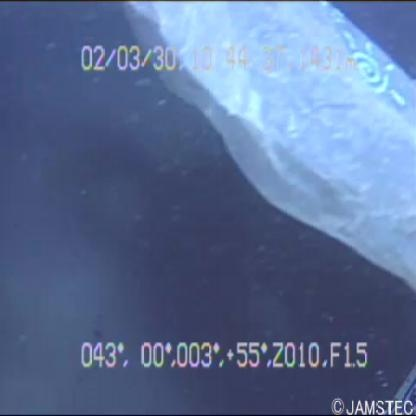

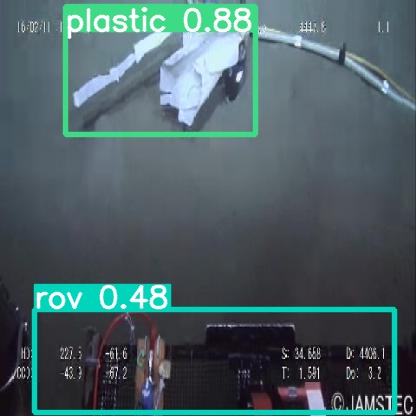

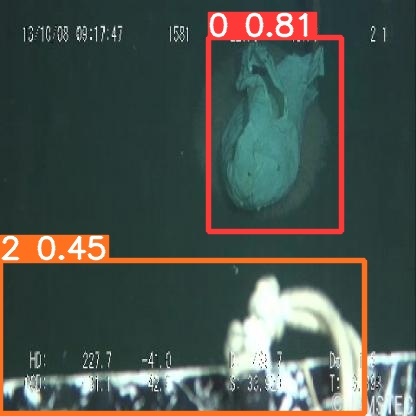

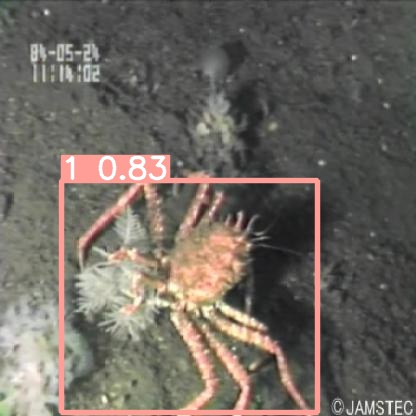

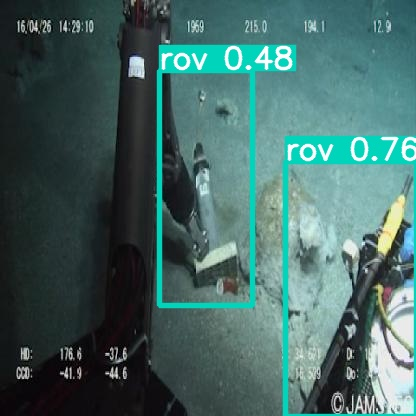

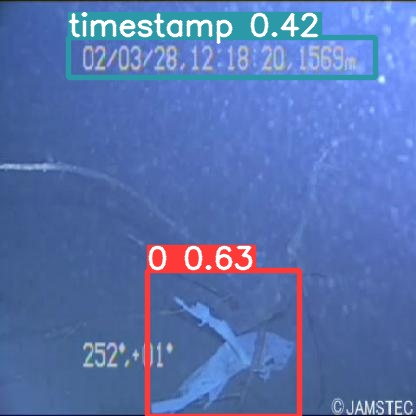

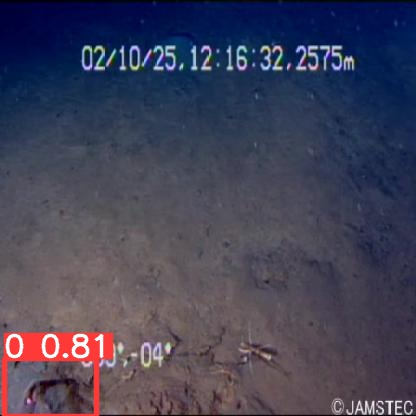

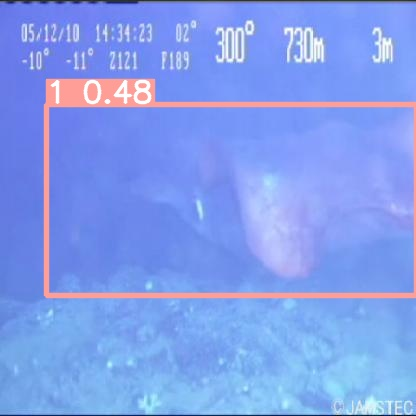

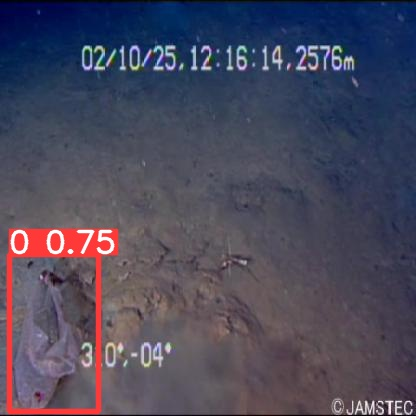

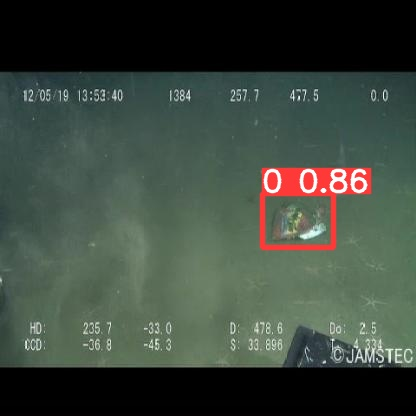

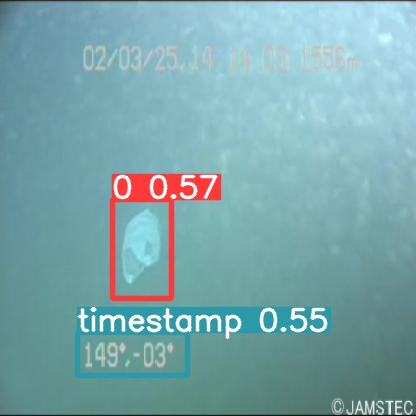

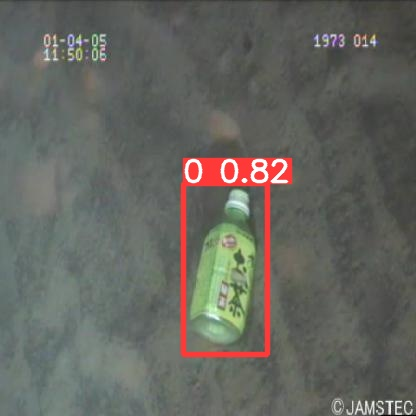

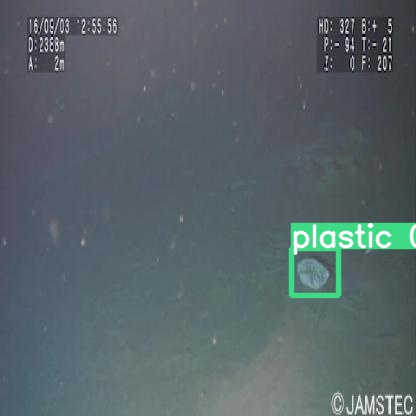

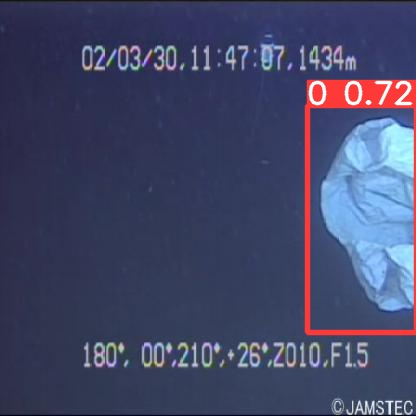

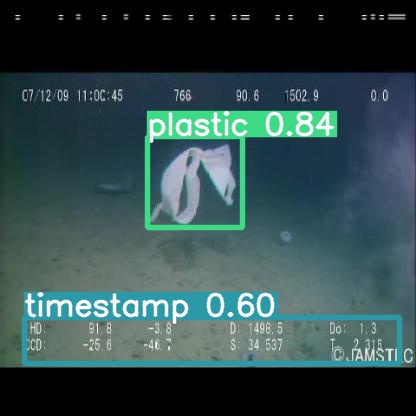

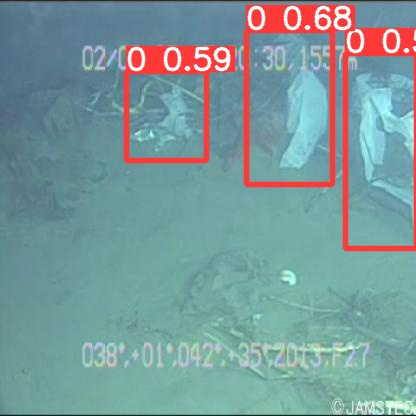

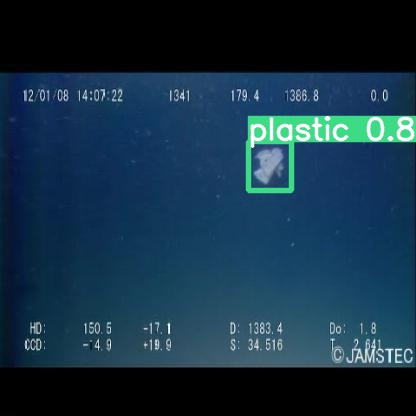

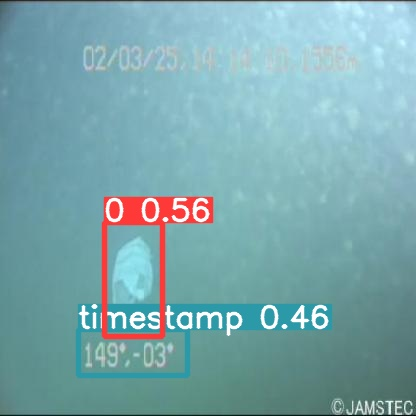

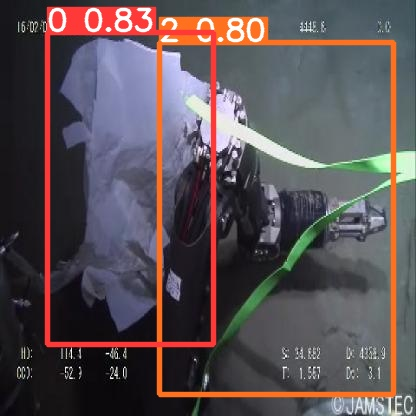

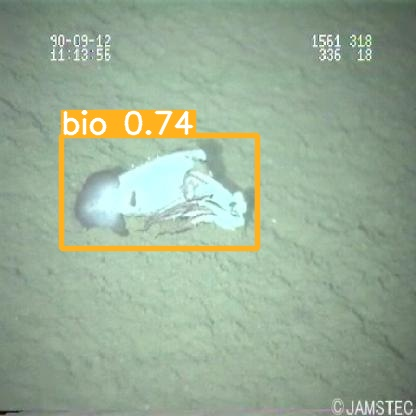

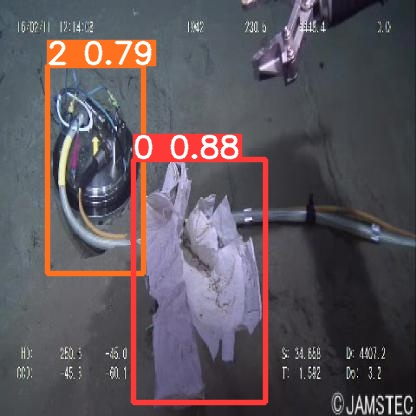

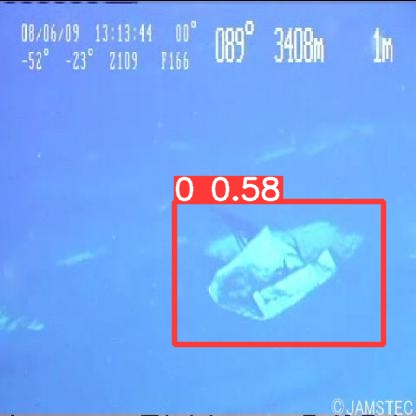

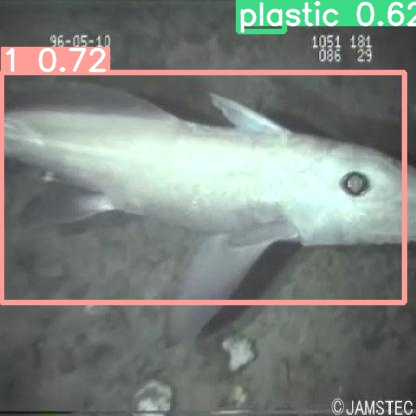

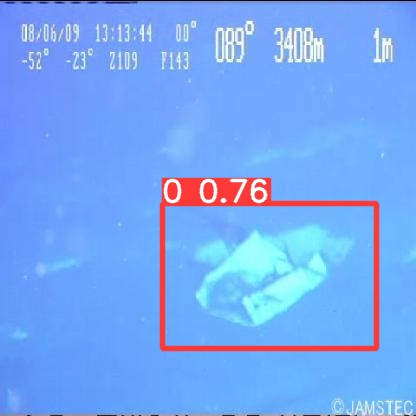

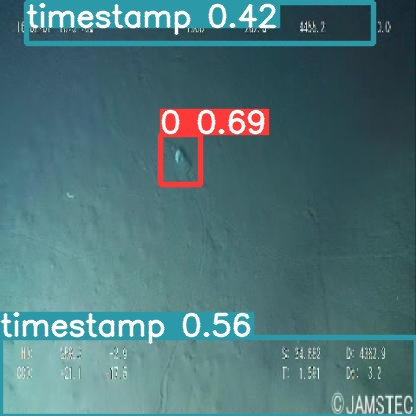

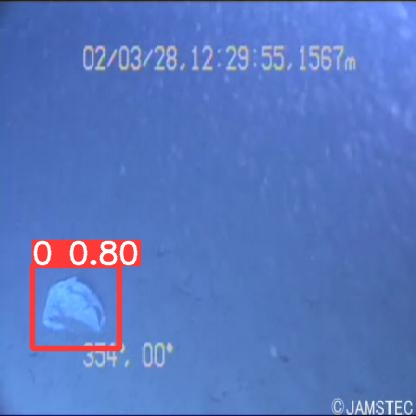

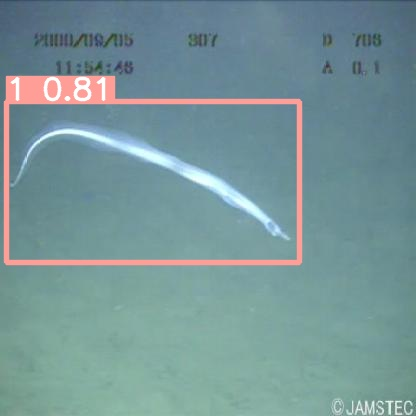

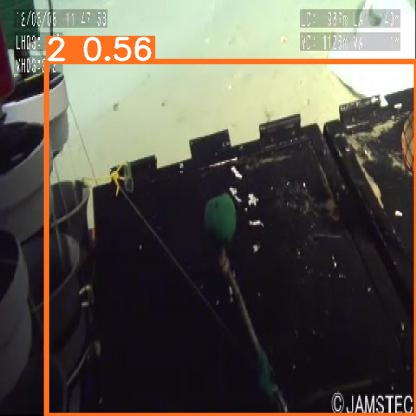

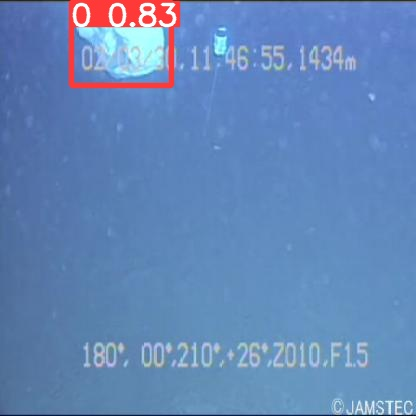

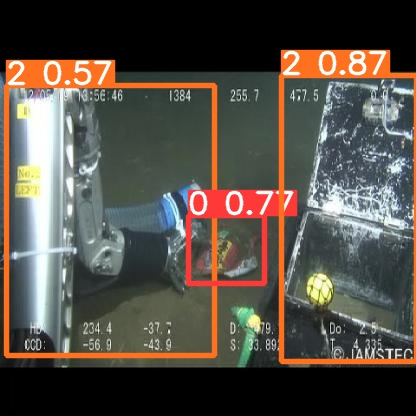

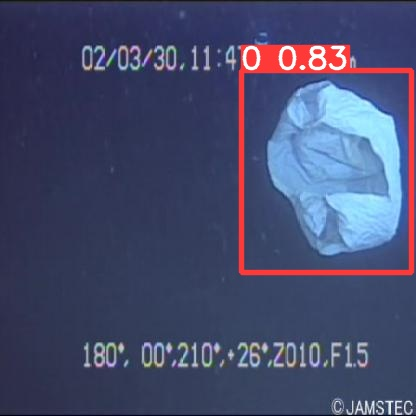

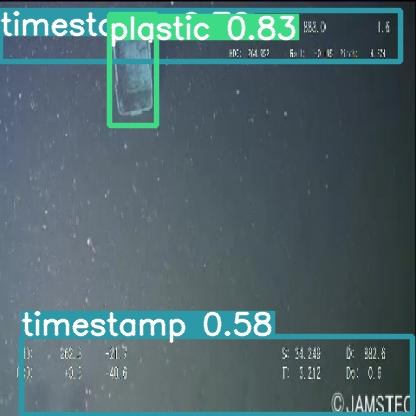

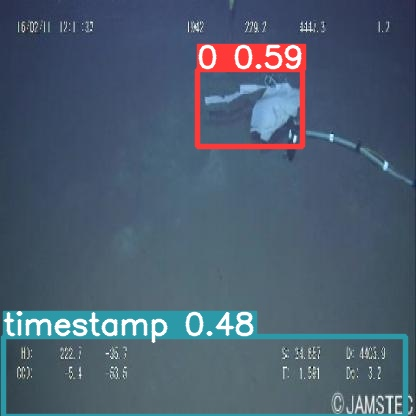

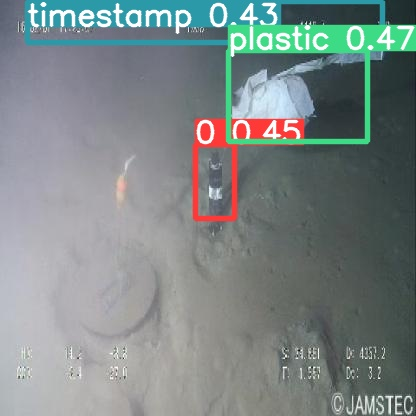

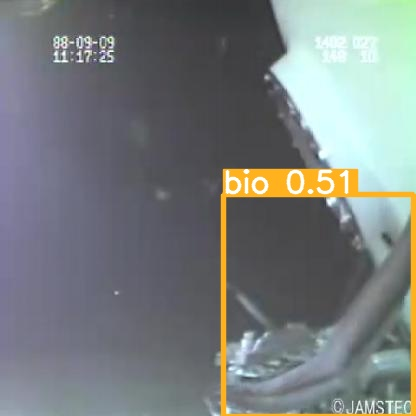

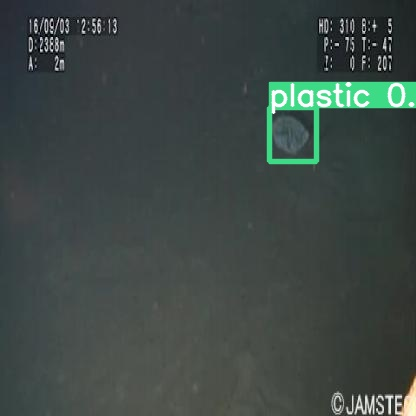

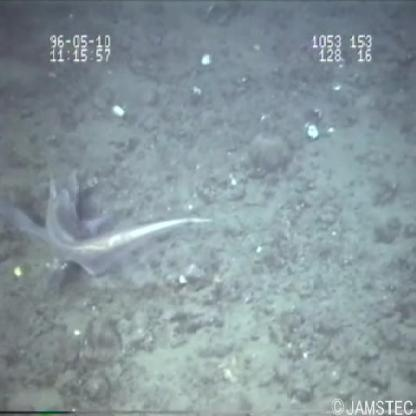

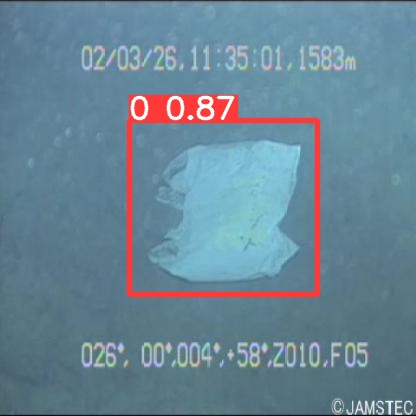

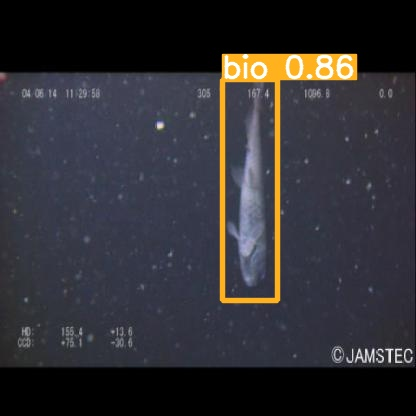

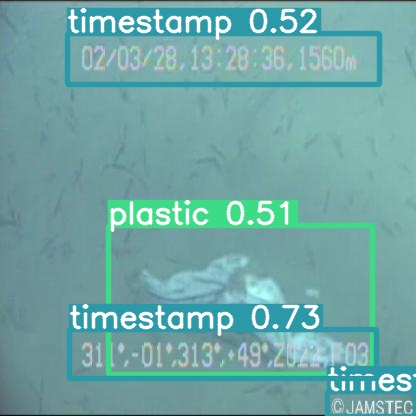

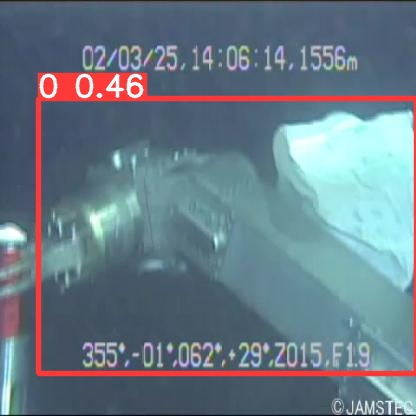

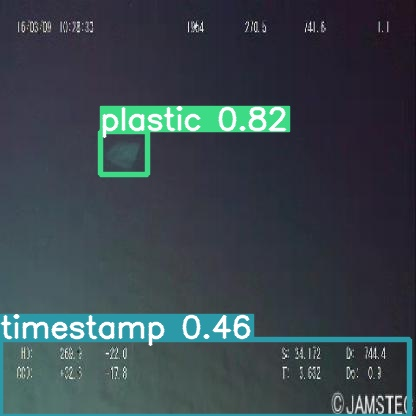

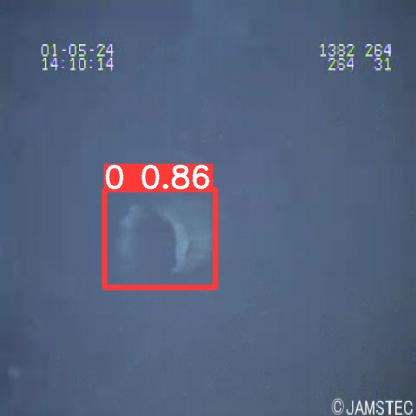

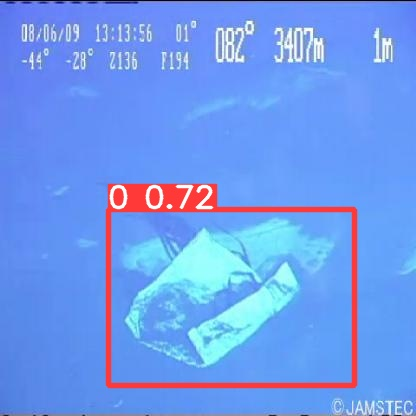

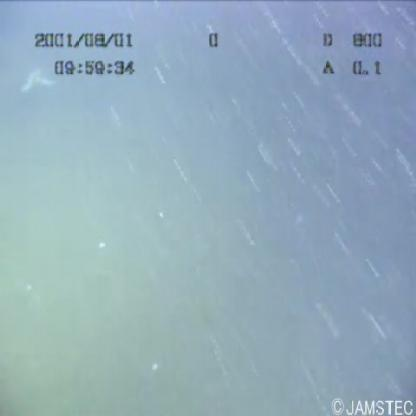

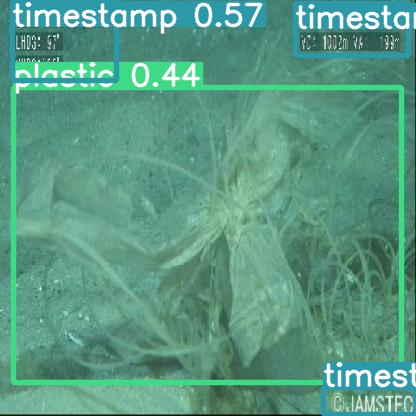

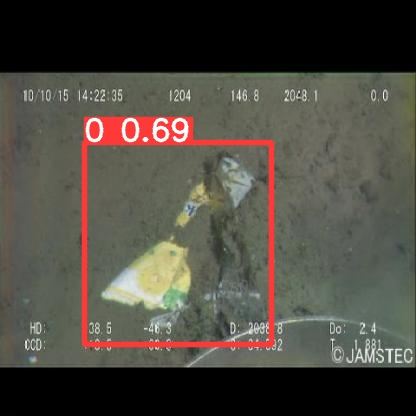

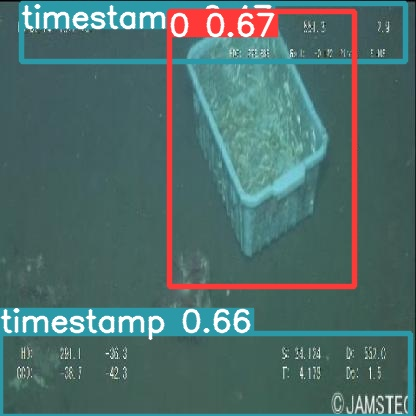

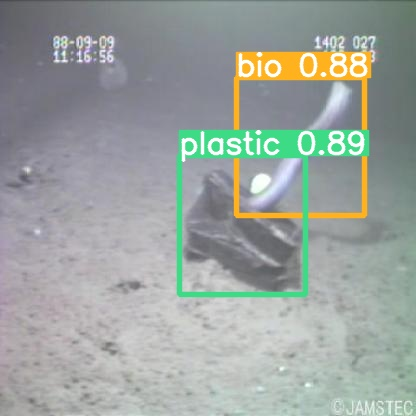

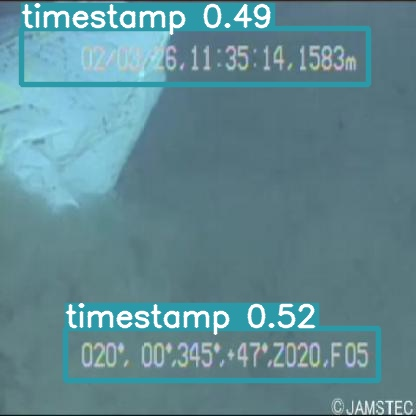

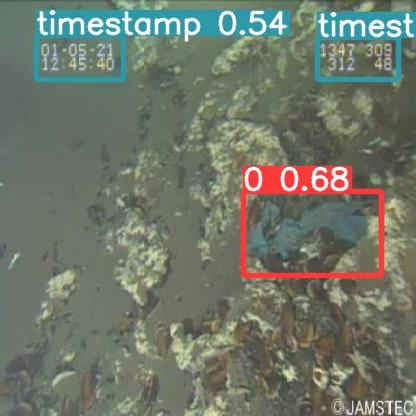

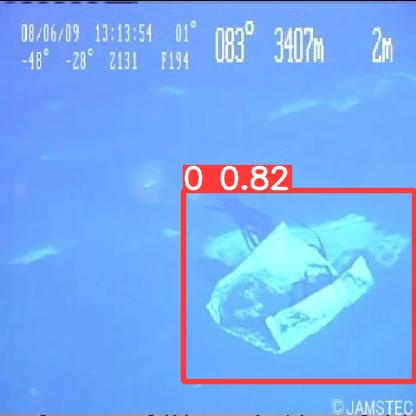

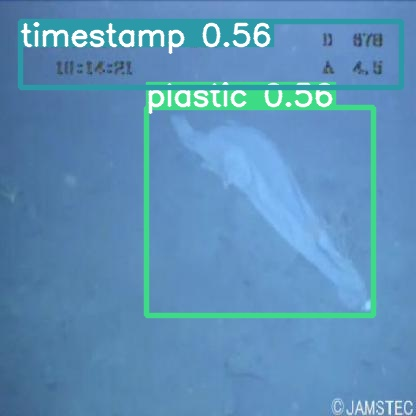

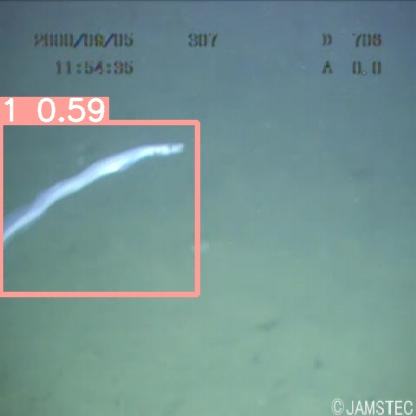

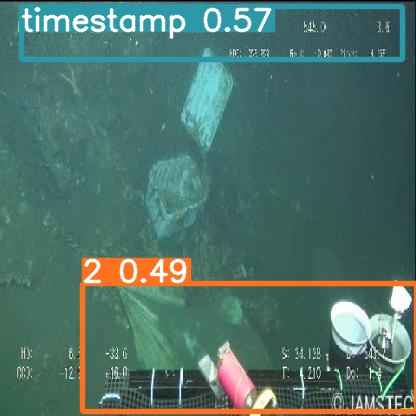

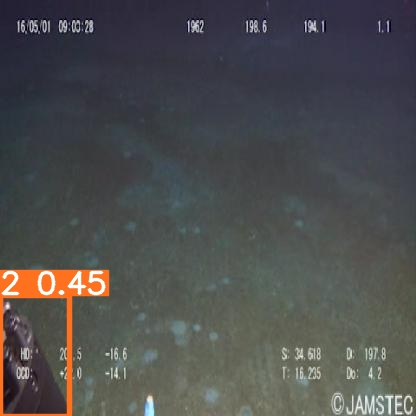

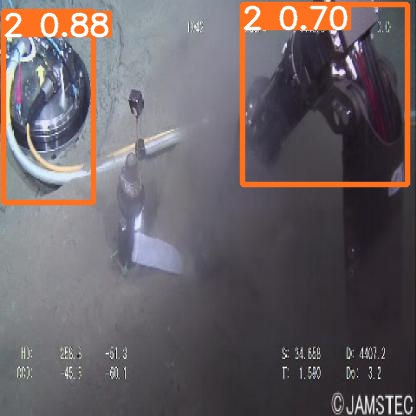

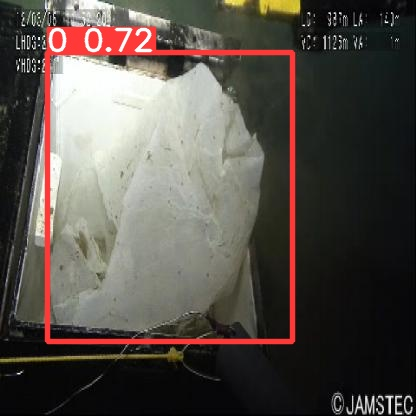

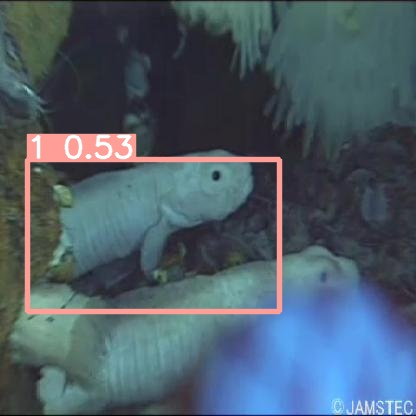

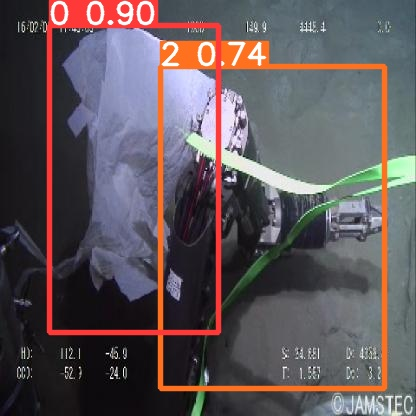

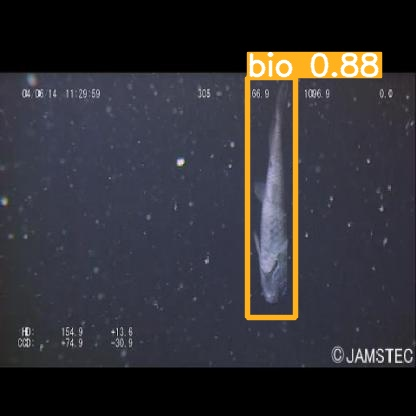

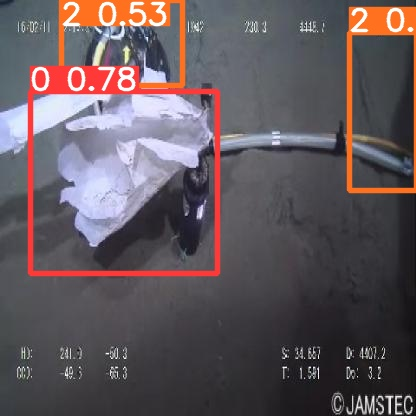

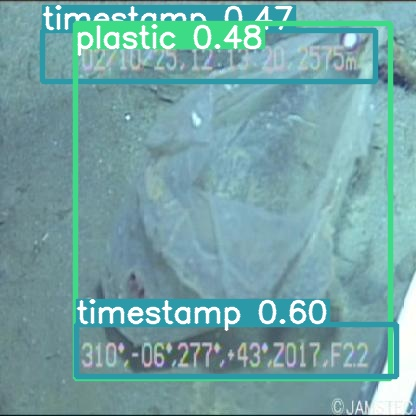

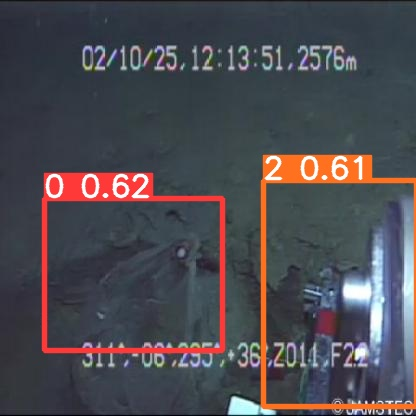

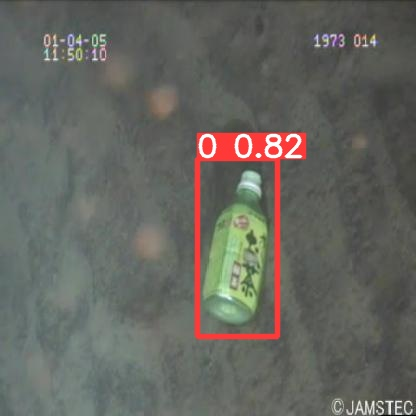

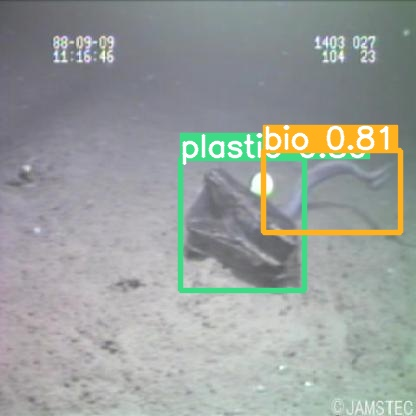

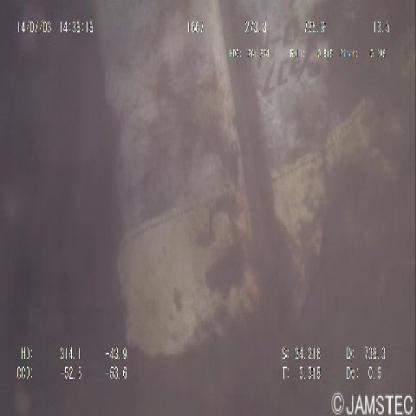

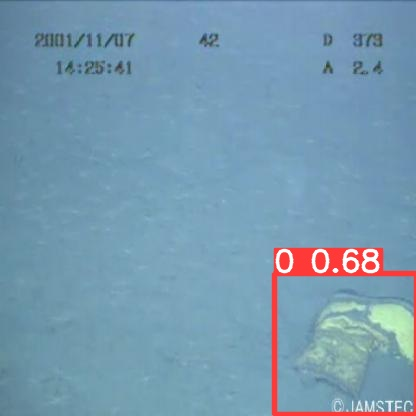

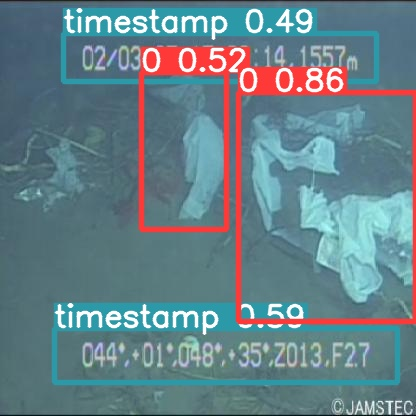

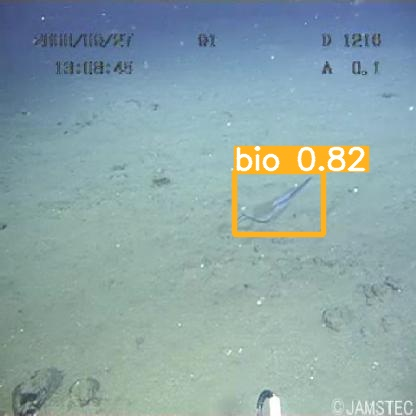

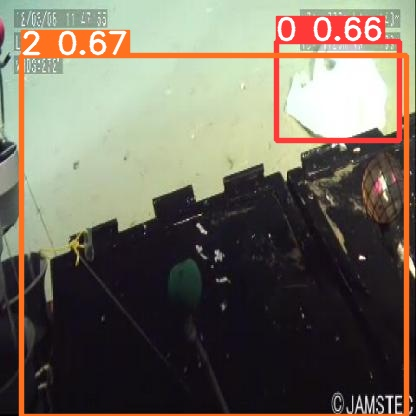

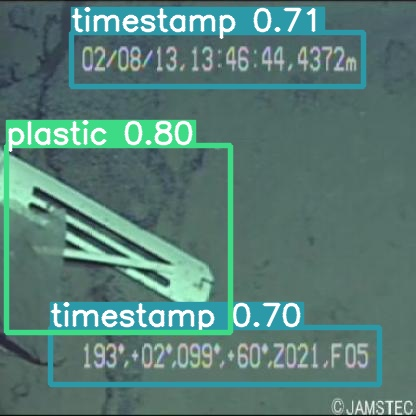

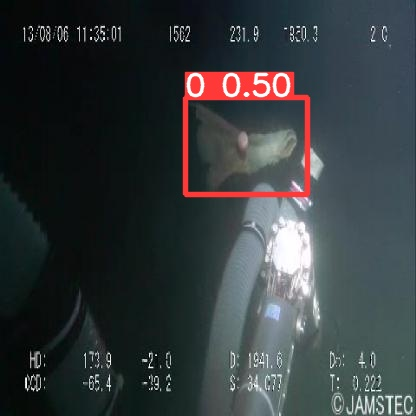

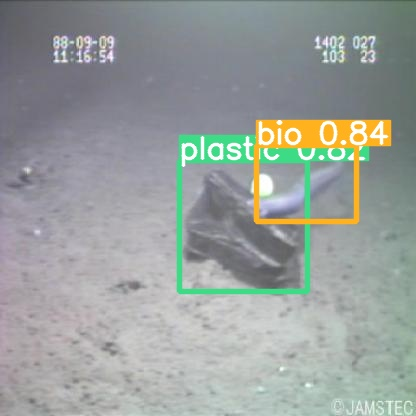

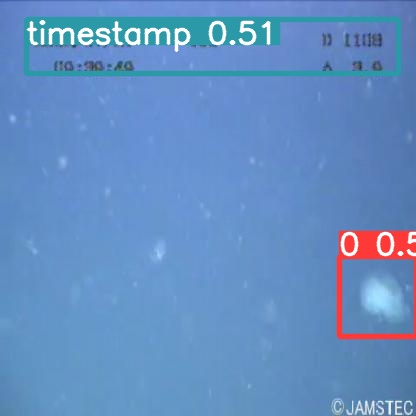

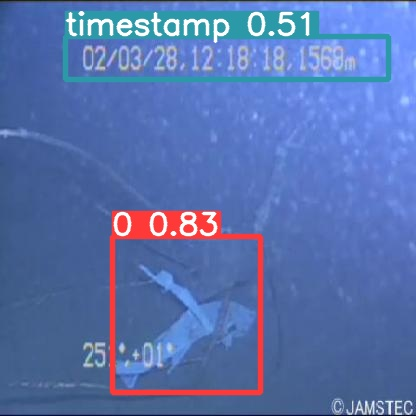

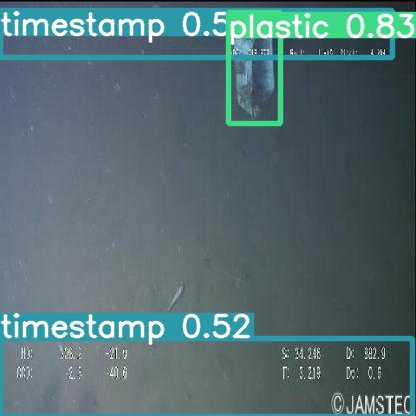

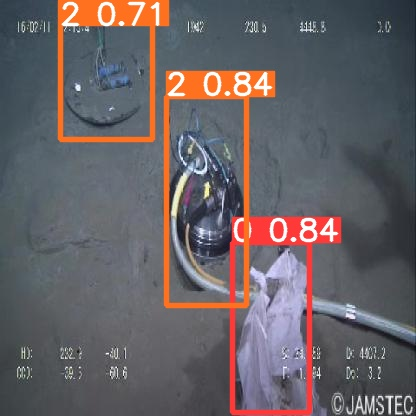

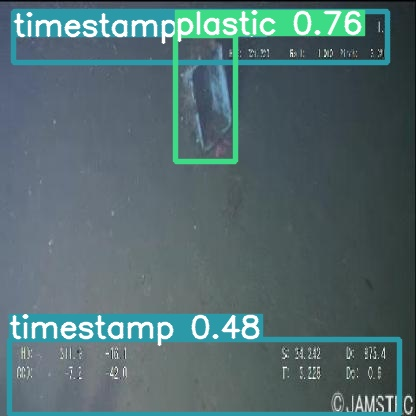

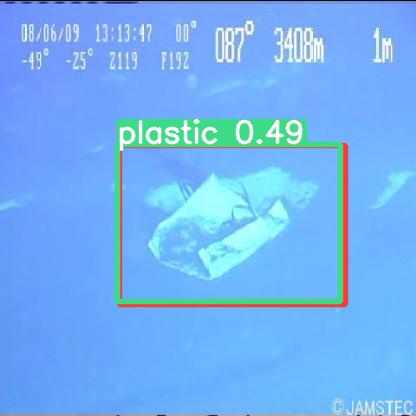

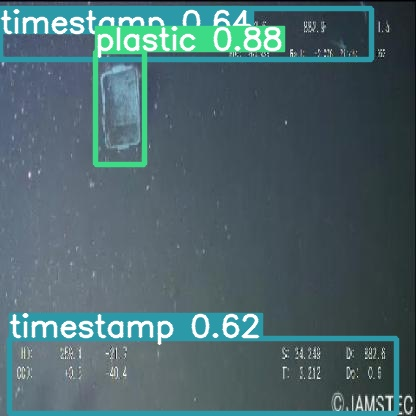

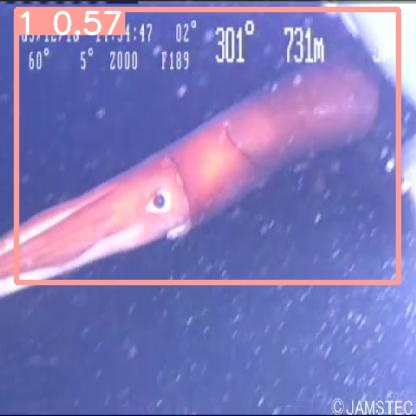

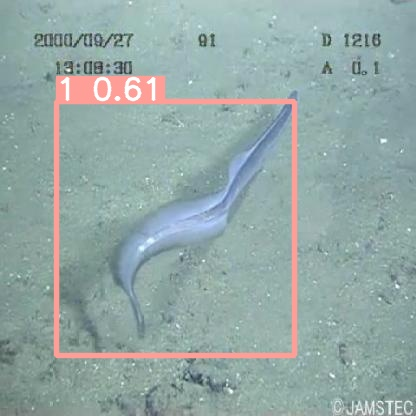

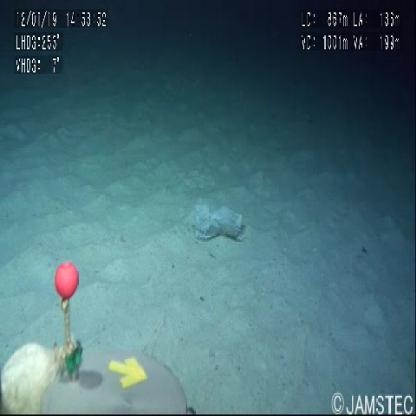

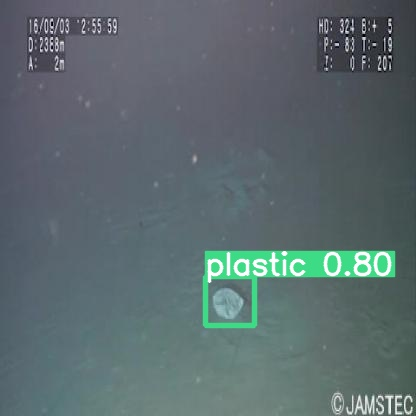

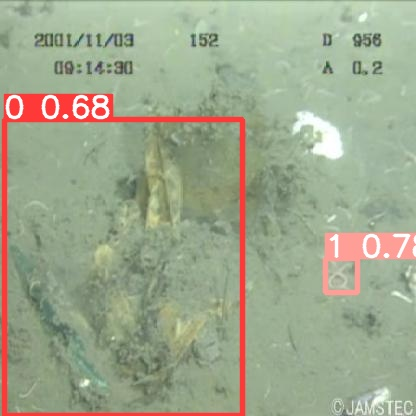

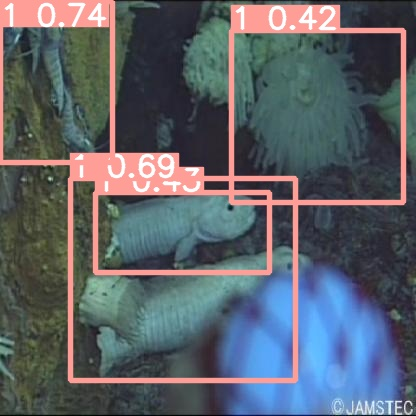

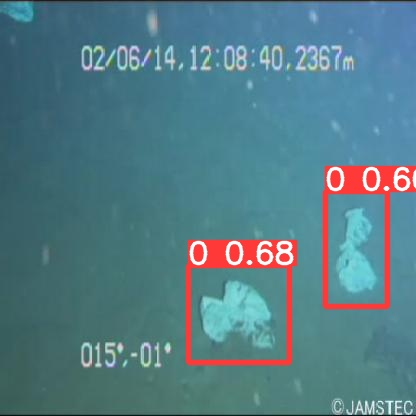

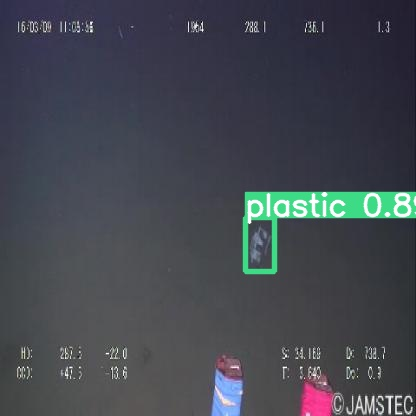

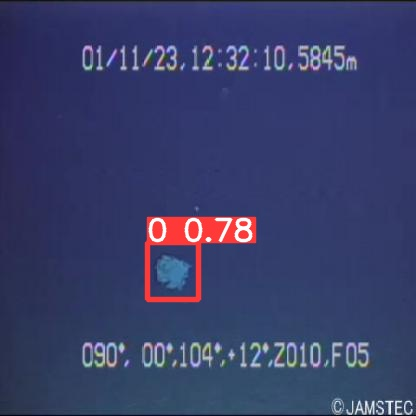

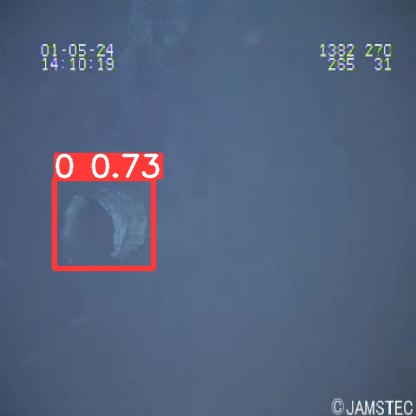

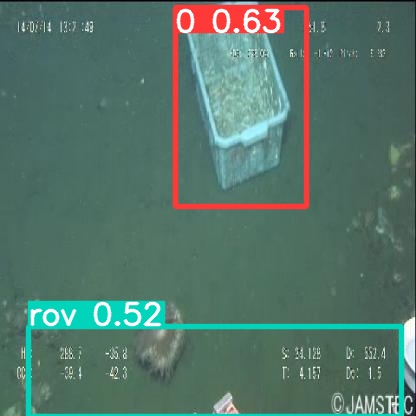

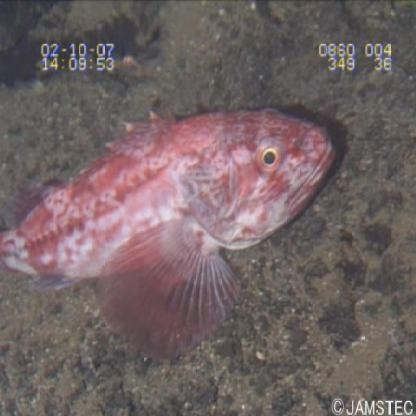

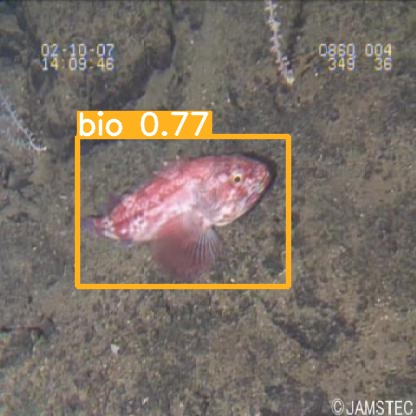

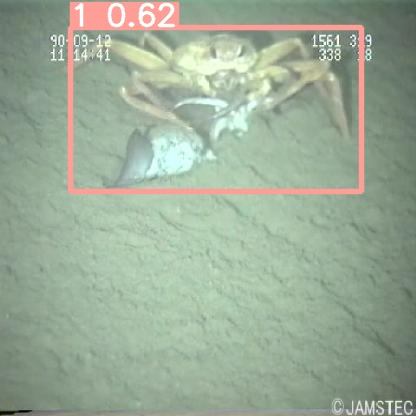

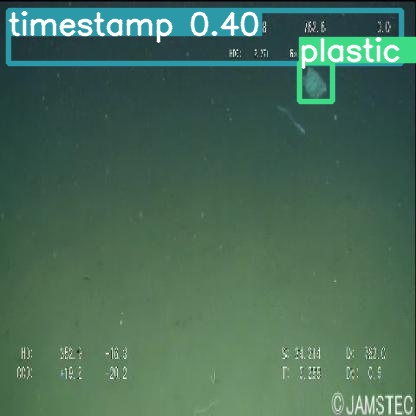

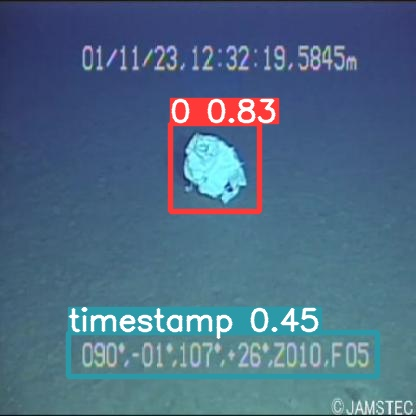

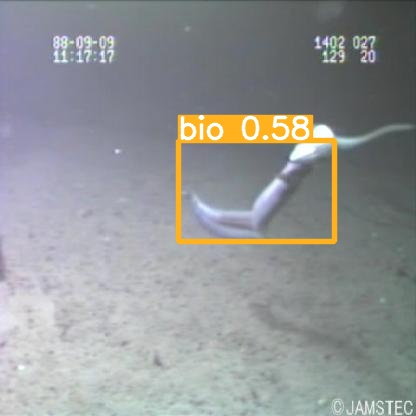

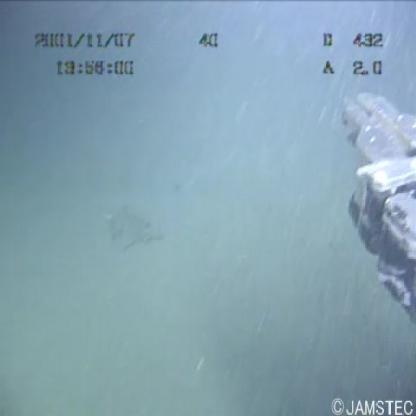

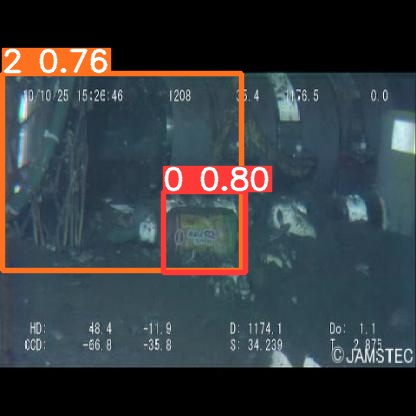

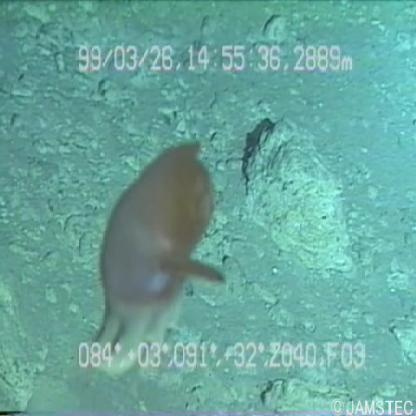

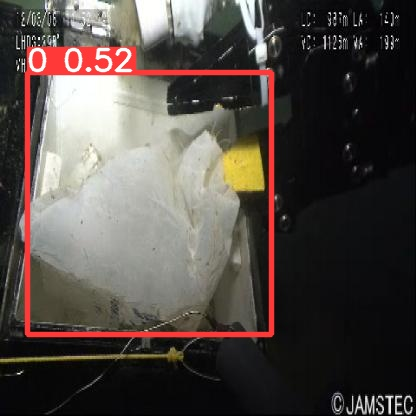

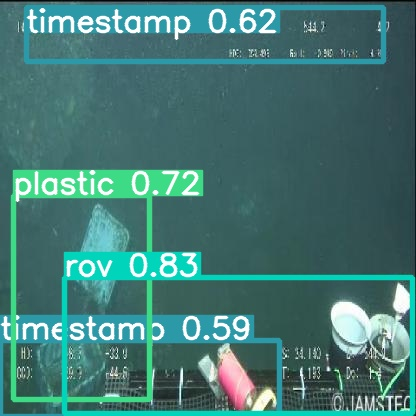

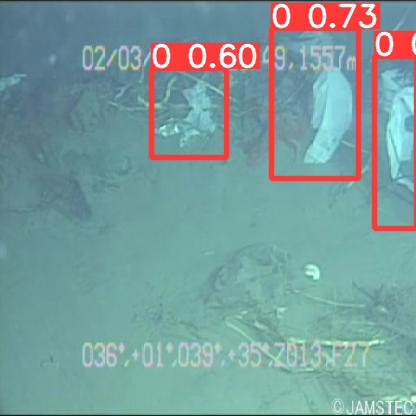

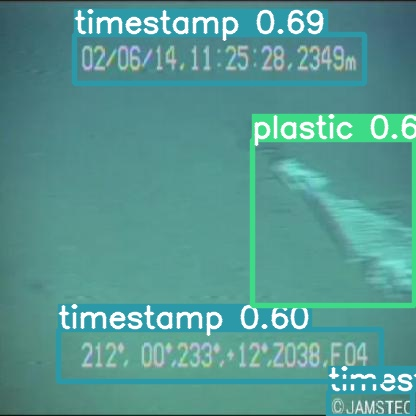

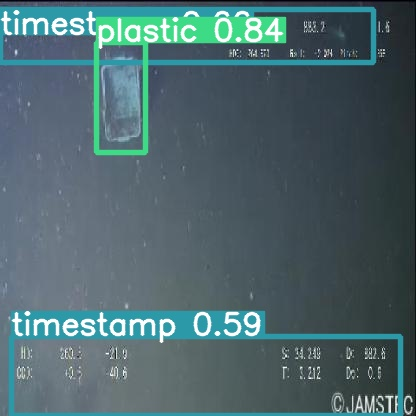

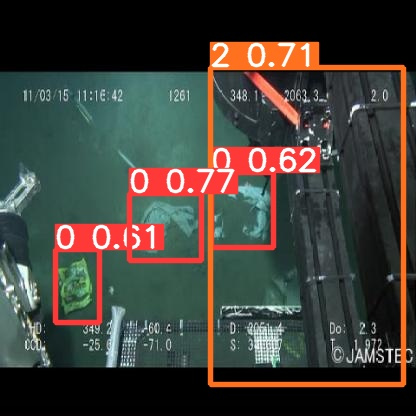

In [23]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/My\ Drive